<div class="alert alert-info">
    <center> 
        <h1> Players stats </h1> 
    </center>
</div>

<h1> Libraries </h1>

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

<h1> Files </h1>

In [2]:
regular_season = pd.read_csv("Data_regular_season.csv")
regular_season = regular_season.set_index('Player')
playoffs = pd.read_csv("Data_playoffs.csv")
playoffs = playoffs.set_index('Player')

playoffs.head(5)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,7491,1871,2348,445,250,3
MJ,5987,1022,1152,376,158,2
Kareem,5762,767,2481,189,476,5
Kobe,5640,1040,1119,310,144,2
Karl_Malone,4761,610,2062,258,135,4


<h2> Totals : </h2>

In [3]:
totals = regular_season + playoffs
totals["Primary Position"] = np.int64(totals["Primary Position"]*0.5)
totals.head()

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,41732,11217,11753,2460,1207,3
MJ,38279,6655,7824,2320,1051,2
Kareem,44149,6427,19921,1349,3665,5
Kobe,39283,7346,8166,2254,784,2
Karl_Malone,41689,5858,17030,2343,1280,4


<h2> Function: create Heatmap </h2>

In [4]:
def create_heatmap(totals, size=(10,5), annotations=True):
    correlation_matrix = totals.corr()
   
    plt.figure(figsize=size)
    color_palette = sns.color_palette("light:#4d91ff", as_cmap=True)
    ax = sns.heatmap(data=correlation_matrix, cmap=color_palette, annot=annotations)
    plt.title("Heatmap: correlation matrix")

    plt.show()

<h2> Heatmap </h2>

In [5]:
heatmap_button = widgets.Button(
    description="Show heatmap",
    button_style="info"
)

heatmap_show_annotations = widgets.Checkbox(
    value=True,
    description="Show annotations"
)

heatmap_width = widgets.IntSlider(
    value=10,
    min=5,
    max=10,
    description="Width"
)

heatmap_height = widgets.IntSlider(
    value=5, 
    min=5,
    max=10,
    description="Height"
)

heatmap_output = widgets.Output()

In [6]:
@heatmap_button.on_click
def on_click(self): 
    heatmap_output.clear_output()
    annot = heatmap_show_annotations.value
    figsize = (heatmap_width.value,heatmap_height.value)
    with heatmap_output:
        create_heatmap(totals, size=figsize,annotations=annot)

In [7]:
display(heatmap_show_annotations, heatmap_width, heatmap_height, heatmap_button, heatmap_output)

Checkbox(value=True, description='Show annotations')

IntSlider(value=10, description='Width', max=10, min=5)

IntSlider(value=5, description='Height', max=10, min=5)

Button(button_style='info', description='Show heatmap', style=ButtonStyle())

Output()

<h1> Stats grouped by position </h1>

<h2> Point guards </h2>

In [8]:
point_guards = totals[totals["Primary Position"]==1]
point_guards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Magic,21408,12487,8024,2082,438,1
Stockton,22147,17645,4659,3603,365,1
Robertson,28620,10656,8382,92,8,1


<h2> Shooting guards </h2>

In [9]:
shooting_guards = totals[totals["Primary Position"] == 2]
shooting_guards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
MJ,38279,6655,7824,2320,1051,2
Kobe,39283,7346,8166,2254,784,2
Dwyane_Wade,27119,6571,5861,1893,1060,2


<h2> Small forwards </h2>

In [10]:
small_forwards = totals[totals["Primary Position"] == 3]
small_forwards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,41732,11217,11753,2460,1207,3
Paul_Pierce,29577,5287,8512,1956,850,3
Dominique_Wikins,28091,2820,7544,1451,677,3


<h2> Power forwards </h2>

In [11]:
power_forwards = totals[totals["Primary Position"] == 4]
power_forwards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Karl_Malone,41689,5858,17030,2343,1280,4
Duncan,31668,4989,17950,1193,3588,4
Dirk,35223,4011,12935,1359,1410,4


<h2> Centers </h2>

In [12]:
centers = totals[totals["Primary Position"] == 5]
centers.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Kareem,44149,6427,19921,1349,3665,5
Wilt,35026,5316,27837,0,0,5
Shaq,33846,3608,15607,856,3191,5


<h3> Operations : points </h3>

In [13]:
def getTotalPoints(size=(5,15)):
    t = totals["Points"].sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displayPoints():
    ordered = totals.sort_values(by="Points",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Points"][i]}')

<center class="alert alert-info">
    <h1> Stats: points </h1>
</center>

In [14]:
points_button = widgets.Button(
    description="Show points",
    button_style="info"
)

points_width = widgets.IntSlider(
    description="Width",
    value=20,
    min=5,
    max=20,
)

points_height = widgets.IntSlider(
    description="Height",
    value=5,
    min=5,
    max=15
)

points_output = widgets.Output()

In [15]:
total_points = ()

@points_button.on_click
def on_click(self):
    points_output.clear_output()
    size=(points_width.value, points_height.value)
    with points_output:
        globals()["total_points"] = getTotalPoints(size=size)
        displayPoints()

In [16]:
display(points_width, points_height, points_button, points_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show points', style=ButtonStyle())

Output()

<h3> Operations: assists </h3>

In [17]:
def getTotalAssists(size=(5,15)):
    t = totals["Assists"].sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displayAssists():
    ordered = totals.sort_values(by="Assists",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Assists"][i]}')

<center class="alert alert-info">
    <h1> Stats: assists </h1>
</center>

In [18]:
assists_button = widgets.Button(
    description="Show total assists",
    button_style="info"
)

assists_width = widgets.IntSlider(
    description="Width",
    value=20,
    min=5,
    max=20
) 

assists_height = widgets.IntSlider(
    description="Height",
    value=5,
    min=5,
    max=15
)

assists_output = widgets.Output()

In [19]:
total_assists = ()

@assists_button.on_click
def on_click(self):
    assists_output.clear_output()
    size=(assists_width.value, assists_height.value)
    with assists_output:
        globals()["total_assists"] = getTotalAssists(size=size)
        displayAssists()

In [20]:
display(assists_width, assists_height, assists_button, assists_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total assists', style=ButtonStyle())

Output()

<h2> Operations: rebounds </h2>

In [21]:
def getTotalRebounds(size=(5,15)):
    t = totals["Rebounds"].sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displayRebounds():
    ordered = totals.sort_values(by="Rebounds",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Rebounds"][i]}')

<center class="alert alert-info">
    <h1> Stats: rebounds </h1>
</center>

In [22]:
rebounds_button = widgets.Button(
    description="Show total rebounds", 
    button_style="info"
)

rebounds_width = widgets.IntSlider(
    description="Width",
    value=20,
    min=5,
    max=20
)

rebounds_height = widgets.IntSlider(
    description="height",
    value=5,
    min=5,
    max=15
)

rebounds_output = widgets.Output()

In [23]:
total_rebounds=()

@rebounds_button.on_click
def on_click(self):
    rebounds_output.clear_output()
    size=(rebounds_width.value, rebounds_height.value)
    with rebounds_output:
        globals()["total_rebounds"] = getTotalRebounds(size=size)
        displayRebounds()

In [24]:
display(rebounds_width,rebounds_height,rebounds_button,rebounds_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='height', max=15, min=5)

Button(button_style='info', description='Show total rebounds', style=ButtonStyle())

Output()

<h1> Operations : steals </h1>

In [25]:
def getTotalSteals(size=(5,15)):
    t = totals["Steals"].sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displaySteals():
    ordered = totals.sort_values(by="Steals",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Steals"][i]}')

<center class="alert alert-info">
    <h1> Stats: steals </h1>
</center>

In [26]:
steals_button = widgets.Button(
    description="Show total steals",
    button_style="info"
)

steals_width = widgets.IntSlider(
    description='Width',
    value=20,
    min=5,
    max=20
)

steals_height = widgets.IntSlider(
    description="Height",
    value=5,
    min=5,
    max=15
)

steals_output = widgets.Output()

In [27]:
total_steals = ()

@steals_button.on_click
def on_click(self):
    steals_output.clear_output()
    size = (steals_width.value,steals_height.value)
    with steals_output:
        globals()["total_steals"] = getTotalSteals(size)
        displaySteals()

In [28]:
display(steals_width,steals_height,steals_button,steals_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total steals', style=ButtonStyle())

Output()

<h1> Operations : blocks </h1>

In [29]:
def getTotalBlocks(size=(5,15)):
    t = totals["Blocks"].sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displayBlocks():
    ordered = totals.sort_values(by="Blocks",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Blocks"][i]}')

<center class="alert alert-info">    
    <h1> Stats : blocks </h1>
</center>

In [30]:
blocks_button = widgets.Button(
    description="Show total blocks",
    button_style="info"
)

blocks_width = widgets.IntSlider(
    description="Width",
    value=20,
    min=5,
    max=20
)

blocks_height = widgets.IntSlider(
    description='Height',
    value=5,
    min=5,
    max=15
)

blocks_output = widgets.Output()

In [31]:
total_blocks = ()

@blocks_button.on_click
def on_click(self):
    blocks_output.clear_output()
    size = (blocks_width.value,blocks_height.value)
    with blocks_output:
        globals()["total_blocks"] = getTotalBlocks(size)
        displayBlocks()

In [32]:
display(blocks_width,blocks_height,blocks_button,blocks_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total blocks', style=ButtonStyle())

Output()

<h1> Operations: totals </h1>

In [33]:
def getTotalTotals(size=(5,15)):
    t = totals.sum(axis=1)
    t = t.sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displayTotals():
    i = 0
    for element in total_totals.index:
        print(f"{i+1}-{element} : {total_totals[i]}")
        i+=1

<center class="alert alert-info">
    <h1> Stats: totals </h1>
</center>

In [34]:
totals_button = widgets.Button(
    description="Show totals",
    button_style="info"
)

totals_width = widgets.IntSlider(
    description="Width",
    value=20,
    min=5,
    max=20
)

totals_height = widgets.IntSlider(
    description="Height",
    value=5,
    min=5,
    max=15
)

totals_output = widgets.Output()

In [35]:
total_totals = ()

@totals_button.on_click
def on_click(self):
    totals_output.clear_output()
    size = (totals_width.value,totals_height.value)
    with totals_output:
        globals()["total_totals"] = getTotalTotals(size)
        displayTotals()

In [36]:
display(totals_width,totals_height,totals_button,totals_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show totals', style=ButtonStyle())

Output()

<h1> Totals grouped by position </h1>

<h2> Guards </h2>

<h3> Operations </h3>

In [37]:
def TotalsByPosition_Guards():
    
    pg_totals = point_guards.sum(axis=1)
    sg_totals = shooting_guards.sum(axis=1)
    
    t = pg_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Point guards")
    t.plot.bar()
    plt.show()
    
    ordered = pg_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')
        
    t = sg_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Shooting guards")
    t.plot.bar()
    plt.show()
    
    ordered = sg_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

<h3 class="alert alert-info"> Totals: guards </h3>

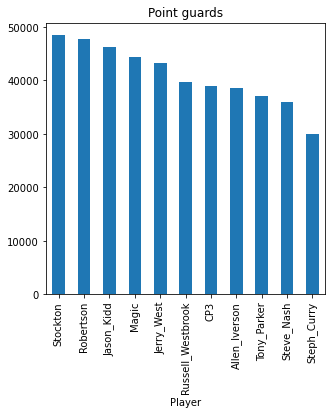

 1 - Stockton :  48420
 2 - Robertson :  47759
 3 - Jason_Kidd :  46198
 4 - Magic :  44440
 5 - Jerry_West :  43193
 6 - Russell_Westbrook :  39731
 7 - CP3 :  38999
 8 - Allen_Iverson :  38504
 9 - Tony_Parker :  37128
 10 - Steve_Nash :  36001
 11 - Steph_Curry :  30047


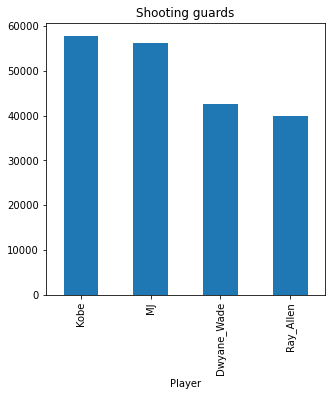

 1 - Kobe :  57835
 2 - MJ :  56131
 3 - Dwyane_Wade :  42506
 4 - Ray_Allen :  39886


In [38]:
TotalsByPosition_Guards()

<h2> Forwards </h2>

<h3> Operations </h3>

In [39]:
def TotalsByPosition_Forwards():
    
    sf_totals = small_forwards.sum(axis=1)
    pf_totals = power_forwards.sum(axis=1)
    
    t = sf_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Small Forwards")
    t.plot.bar()
    plt.show()
    
    ordered = sf_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

        
    t = pf_totals.sort_values(ascending=False)
    plt.figure(figsize=[5,5])
    plt.title("Power forwards")
    t.plot.bar()
    plt.show()
    
    ordered = pf_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

<h3 class="alert alert-info"> Totals: forwards </h3>

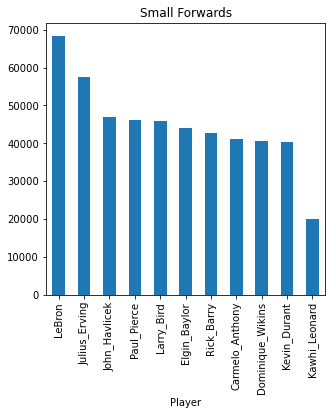

 1 - LeBron :  68372
 2 - Julius_Erving :  57555
 3 - John_Havlicek :  46975
 4 - Paul_Pierce :  46185
 5 - Larry_Bird :  45857
 6 - Elgin_Baylor :  44153
 7 - Rick_Barry :  42616
 8 - Carmelo_Anthony :  41064
 9 - Dominique_Wikins :  40586
 10 - Kevin_Durant :  40283
 11 - Kawhi_Leonard :  19970


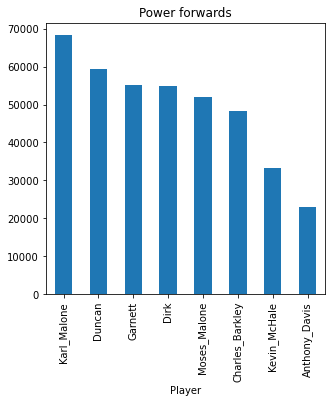

 1 - Karl_Malone :  68204
 2 - Duncan :  59392
 3 - Garnett :  55048
 4 - Dirk :  54942
 5 - Moses_Malone :  51986
 6 - Charles_Barkley :  48256
 7 - Kevin_McHale :  33220
 8 - Anthony_Davis :  22896


In [40]:
TotalsByPosition_Forwards()

<h2> Centers </h2>

<h3> Operations </h3>

In [41]:
def TotalsByPosition_Centers():
    
    c_totals = centers.sum(axis=1)
    
    t = c_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Centers")
    t.plot.bar()
    plt.show()
    
    ordered = c_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

<h3 class="alert alert-info"> Stats </h3>

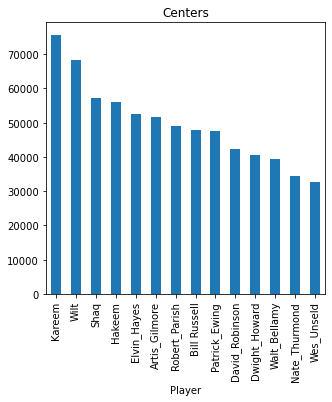

 1 - Kareem :  75516
 2 - Wilt :  68184
 3 - Shaq :  57113
 4 - Hakeem :  56063
 5 - Elvin_Hayes :  52572
 6 - Artis_Gilmore :  51647
 7 - Robert_Parish :  49087
 8 - Bill Russell :  47794
 9 - Patrick_Ewing :  47620
 10 - David_Robinson :  42340
 11 - Dwight_Howard :  40459
 12 - Walt_Bellamy :  39497
 13 - Nate_Thurmond :  34515
 14 - Wes_Unseld :  32827


In [42]:
TotalsByPosition_Centers()

<h1> Comparing two players </h1>

In [43]:
player_one = str(input("First player's name: "))

First player's name:  Wilt


In [44]:
player_two = str(input("Second player's name: "))

Second player's name:  MJ


In [45]:
total_one = int(totals[totals.index==player_one].sum(axis=1))

In [46]:
total_two = int(totals[totals.index==player_two].sum(axis=1))

In [47]:
if total_one is not None and total_two is not None:
    if total_one > total_two:
        print(f"{player_one} has a higher total")
    else:
        print(f"{player_two} has a higher total")
else:
    print("Error!")

Wilt has a higher total
